https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/README.md   
https://wikidocs.net/21669

### 지도학습
#### 입력데이터와 정답데이터가 주어졌을 때, 이 데이터의 상관관계를 가장 잘 표현하는 함수를 구하는 것
  
### 비지도학습
#### 입력데이터만 주어졌을 때, 모델 스스로 데이터 안에서 어떠한 관계를 찾아내는 것
  
### 강화학습
#### 환경과 상호작용을 하며, 잘한 행동에는 플러스를 잘못한 행동에는 마이너스를 주면서 최적의 행동을 찾는 것


# 1 - Introduction
## Hello Tensorflow

In [31]:
import tensorflow as tf

In [32]:
hello = tf.constant('Hello, Tensorflow!')
print(hello)
print(hello.numpy())

tf.Tensor(b'Hello, Tensorflow!', shape=(), dtype=string)
b'Hello, Tensorflow!'


## Basic operations

In [33]:
import tensorflow as tf

In [34]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

add = tf.add(a, b)
sub = tf.subtract(a, b)
mul = tf.multiply(a, b)
div = tf.divide(a, b)

print('add = ', add.numpy())
print('sub = ', sub.numpy())
print('mul = ', mul.numpy())
print('div = ', div.numpy())

add =  5
sub =  -1
mul =  6
div =  0.6666666666666666


In [35]:
mean = tf.reduce_mean([a, b, c])
sum = tf.reduce_sum([a, b, c])

print('mean = ', mean.numpy())
print('sum = ', sum.numpy())

mean =  3
sum =  10


In [36]:
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])

product = tf.matmul(matrix1, matrix2)
product

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[19., 22.],
       [43., 50.]], dtype=float32)>

In [37]:
product.numpy()

array([[19., 22.],
       [43., 50.]], dtype=float32)

## Basic Models
- ### Linear Regression(선형 회귀)
    - #### 회귀 분석 : 관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한 뒤 적합도를 측정해 내는 분석 방법
    - #### 선형 회귀 : $y = Wx + b$
        #### 종속 변수 y와 한 개 이상의 독립 변수(또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법
    

입력값에 가중치를 곱하고 편향을 더하여 결과값을 구하고  
정답과의 오차를 MSE(평균제곱오차)으로 구하여 오차가 가장 작은 가중치를 구하는 것이 목표

Weight(가중치) : 독립 변수와 곱해지는 값(직선의 기울기), 최초의 가중치는 랜덤한 값을 사용한다.   
Bias(편향) : 별도로 더해지는 값(절편)   
Mean Squared Error(평균 제곱 오차) : $(정답 - 예측)^2\over{n}$ 으로 정답에 가까울수록 값이 작아지고 오답에 가까울수록 큰 값이 나온다.   
Gradient Descent Algorithm(경사 하강법) : MSE를 미분한 기울기와 학습률을 곱한값만큼 가중치에서 빼는 방식으로 가중치를 변경하는 방식, 기울기가 0에 가장 가까운 
Stochastic Gradient Descent(확률적 경사 하강법) : 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사 하강법 -> MSE(평균 오차 제곱) 값이 작은 방향으로 Weight와 Bias를 수정

In [38]:
import tensorflow as tf
import numpy as np
rng = np.random

In [39]:
# Parameters
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [40]:
# Training Data
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [41]:
# Weight and Bias(가중치와 편향) 초기값은 랜덤
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

# 선형 회귀(Wx + b)
def linear_regression(x):
    return W * x + b

# Mean squared error(평균 제곱 오차)
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic gradient descent(확률적 경사 하강법)
optimizer = tf.optimizers.SGD(learning_rate)

In [42]:
# 최적화
def run_optimization():
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
    # gradients(기울기)
    gradients = g.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W,b]))

In [43]:
for step in range(1, training_steps + 1):
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print(f'step: {step}, loss: {loss}, W: {W.numpy()}, b: {b.numpy()}')

step: 50, loss: 0.15405608713626862, W: 0.257281631231308, b: 0.7587687969207764
step: 100, loss: 0.1540132462978363, W: 0.2566354274749756, b: 0.7633499503135681
step: 150, loss: 0.15397967398166656, W: 0.25606319308280945, b: 0.7674068212509155
step: 200, loss: 0.15395334362983704, W: 0.25555646419525146, b: 0.7709994316101074
step: 250, loss: 0.15393270552158356, W: 0.25510770082473755, b: 0.7741808891296387
step: 300, loss: 0.15391650795936584, W: 0.25471028685569763, b: 0.7769983410835266
step: 350, loss: 0.15390384197235107, W: 0.25435829162597656, b: 0.7794937491416931
step: 400, loss: 0.15389390289783478, W: 0.25404664874076843, b: 0.7817032933235168
step: 450, loss: 0.15388606488704681, W: 0.2537706792354584, b: 0.7836598753929138
step: 500, loss: 0.15387997031211853, W: 0.2535262703895569, b: 0.7853925228118896
step: 550, loss: 0.15387514233589172, W: 0.25330984592437744, b: 0.7869268655776978
step: 600, loss: 0.15387138724327087, W: 0.2531181871891022, b: 0.7882856726646423


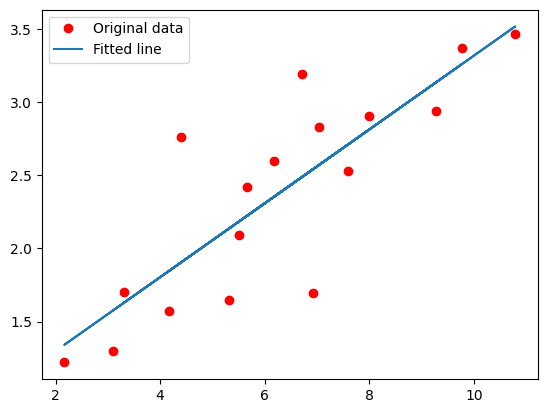

In [44]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

### Tensorflow 자동 미분과 선형 회귀 실습

In [45]:
import tensorflow as tf

In [46]:
w = tf.Variable(2.)

# 2w**2 + 5
def f(w):
    y = w**2
    z = 2*y + 5
    return z

with tf.GradientTape() as tape:
    z = f(w)

# 함수를 w에 대해 미분하여 4w를 만들고 w에 2가 들어가서 8이 나오게 된다.
gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]
